In [1]:
# https://tr.tradingview.com/script/ewujODvl-RS-RSI-Divergence-V1/
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress

In [3]:
symbol ="TSLA"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2019-01-01",end="2021-02-05")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)


rsi = talib.RSI(data["Close"])
df[0]["Rsi14"]= talib.RSI(df[0]["Close"])
df[0]["Rsi50"]= talib.RSI(df[0]["Close"],50)

df[0]

,Date,Open,High,Low,Close,Rsi14,Rsi50
Date,,,,,,,
2018-12-31,17896.0,67.557999,67.842003,65.052002,66.559998,NaN,NaN
2019-01-02,17898.0,61.220001,63.026001,59.759998,62.023998,NaN,NaN
2019-01-03,17899.0,61.400002,61.880001,59.476002,60.071999,NaN,NaN
2019-01-04,17900.0,61.200001,63.599998,60.546001,63.537998,NaN,NaN
2019-01-07,17903.0,64.344002,67.348000,63.549999,66.991997,NaN,NaN
...,...,...,...,...,...,...,...
2021-01-29,18656.0,830.000000,842.409973,780.099976,793.530029,51.810001,60.971647
2021-02-01,18659.0,814.289978,842.000000,795.559998,839.809998,58.542450,62.860423
2021-02-02,18660.0,844.679993,880.500000,842.200012,872.789978,62.556933,64.122972


In [26]:
def plotRsiDivergence(num):
  
  fig = plt.figure(figsize=(12,8))
  gs = gridspec.GridSpec(2, 1, height_ratios = [2,1])
    
  ax_rsi1= plt.subplot(gs[0])    
  plt.title(num_name[num])

  candlestick_ohlc(ax_rsi1,df[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
    
  ax_rsi= plt.subplot(gs[1],sharex=ax_rsi1)
    
  
  ax_rsi.plot(data.index, df[0]["Rsi14"])
  ax_rsi.plot(data.index, df[0]["Rsi50"])
  plt.fill_between(data.index,50,df[0]["Rsi14"]) 
  plt.fill_between(data.index,50,df[0]["Rsi50"]) 


#   legend_labels= ["overbought", "oversold","rsi"]
#   ax_rsi.legend(legend_labels,loc = 2)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_rsi.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  ax_rsi1.grid()
  #ax_rsi.grid()
# Removing the date labels and ticks from the price subplot:
  ax_rsi1.get_xaxis().set_visible(False)
# Removing the gap between the plots:
  fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
  ax_rsi.axhline(50, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
  ax_rsi1.set_ylabel("Price ($)")
  ax_rsi.set_ylabel("% RSI")

 

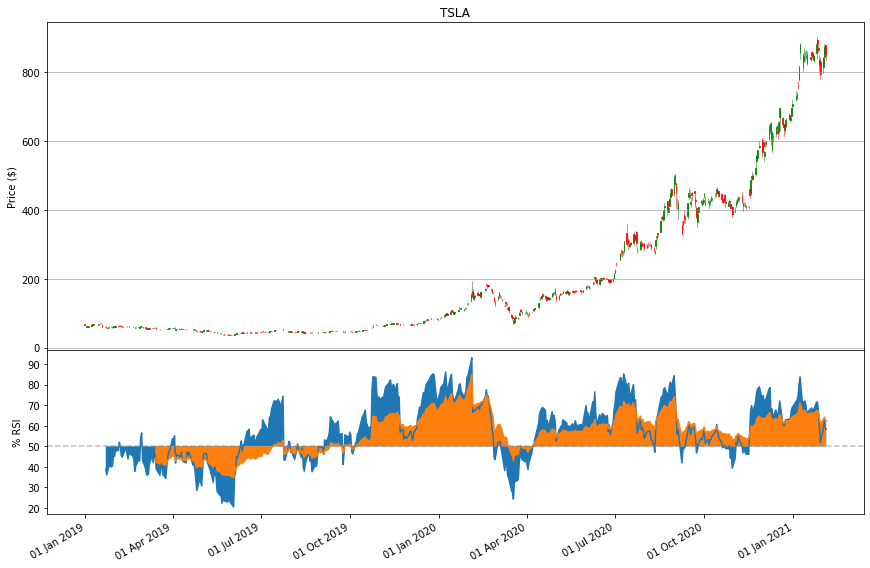

In [27]:
plotRsiDivergence(0)